# Word- Detection (Augmented_Data)

## Packages

In [67]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
import uuid
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
import importlib
import albumentations as A
import random
import os
import cv2
from sklearn.model_selection import train_test_split

## Utility Functions

In [68]:
from lib import load_data as DL
from lib import tf_DataSet as tf_d
from lib import F_Plots as MyPlot
from lib import IoU as iou
from lib import augmetation as Aug
importlib.reload(DL)
importlib.reload(tf_d) 
importlib.reload(MyPlot) 
importlib.reload(iou)
importlib.reload(Aug) 

<module 'lib.augmetation' from 'C:\\Users\\danil\\TensorFlow\\workspace\\UDEA_Object_Detection_Project\\Notebooks\\lib\\augmetation.py'>

# Load Normal - Data 

In [69]:
Data_Path = "../data/img"
df = DL.xml_to_csv(Data_Path)
df['_xmin'] = df['xmin']/df['width']
df['_ymin'] = df['ymin']/df['height']
df['_xmax'] = df['xmax']/df['width']
df['_ymax'] = df['ymax']/df['height']
_class = {"Logo" : 1 , "Thanks" : 2 , "Total":3 , "Change" : 4}
df["class"] = df["class"].map(_class)

# imporbtlib.reload(DL) 
# dic = {'Formato_1': 1, 'Formato_2': 2 ,'Formato_3': 3}
# Data_Normal = DL.create_and_read_metadata(images_path=  'local/data/imgs' ,medata_path= 'local/data' ,name_file = "metadata_02.csv" ,split_value= 0.7 , labels_dic=dic)

df_a = df[["filename","_xmin","_xmax","_ymin","_ymax","class"]]

df_a.head()

,filename,_xmin,_xmax,_ymin,_ymax,class
0,000.jpg,0.123110,0.719222,0.017769,0.063179,1
1,000.jpg,0.373650,0.667387,0.685094,0.720632,3
2,000.jpg,0.332613,0.738661,0.923001,0.972359,2
3,000.jpg,0.434125,0.652268,0.757157,0.785785,4
4,001.jpg,0.118451,0.854214,0.881474,0.964143,2


In [70]:
df.shape

(533, 12)

## Parametros de Aumento

In [71]:
bbox_params = A.BboxParams(
  format='pascal_voc', 
  min_area=1, 
  min_visibility=0.5, 
  label_fields=['field_id']
)

doc_aug_c = A.Compose([
    A.Flip(p=0.25),
    A.RandomGamma(gamma_limit=(20, 300), p=0.5),
    A.RandomBrightnessContrast(p=0.85),
    A.Rotate(limit=35, p=0.9),
    A.RandomRotate90(p=0.25),
    A.RGBShift(p=0.75),
    A.GaussNoise(p=0.25)
], bbox_params=bbox_params)



In [72]:
importlib.reload(Aug) 

IMAGES_PATH = '../data/img/'
DATASET_PATH = '../data/augmented'
IMAGES_PATH_SAVE = f'{DATASET_PATH}/img'
NAME_FILE = "augmented_v1.csv"

Data_Augmented  = Aug.augmented_fuction(
    img_Aug = 6,
    Data = df_a,
    doc_aug = doc_aug_c,
    DATASET_PATH = DATASET_PATH ,
    IMAGES_PATH_SAVE = IMAGES_PATH_SAVE,
    IMAGES_PATH = IMAGES_PATH,
    NAME_FILE = NAME_FILE
)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.09it/s]


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:02<00:00,  1.92it/s]


MemoryError: Unable to allocate 199. MiB for an array with shape (3508, 2481, 3) and data type float64

## Data Augmented

In [91]:
Data_Augmented_P  = Data_Augmented.copy()

In [92]:
Data_Augmented.head()

,filename,xmin,xmax,ymin,ymax,class
0,1_form_aug_0.jpg,0,69,9,281,1
1,1_form_aug_1.jpg,916,1013,0,196,1
2,1_form_aug_2.jpg,0,210,0,88,1
3,1_form_aug_3.jpg,275,463,0,117,1
4,1_form_aug_4.jpg,159,434,0,60,1


In [93]:
Data_Augmented.shape

(3015, 6)

In [94]:
x_len  = []
y_len = []
for i in Data_Augmented_P.iterrows():
    form = cv2.imread(os.path.join(IMAGES_PATH_SAVE,i[1][0]))
    len_y, len_x , _ = form.shape
    x_len.append(len_x)
    y_len.append(len_y)


In [95]:
Data_Augmented_P["x_len"] = pd.Series(x_len)
Data_Augmented_P["y_len"] = pd.Series(y_len) 

In [98]:
Data_Augmented_P['_xmin'] = Data_Augmented_P['xmin']/Data_Augmented_P['x_len']
Data_Augmented_P['_ymin'] = Data_Augmented_P['ymin']/Data_Augmented_P['y_len']
Data_Augmented_P['_xmax'] = Data_Augmented_P['xmax']/Data_Augmented_P['x_len']
Data_Augmented_P['_ymax'] = Data_Augmented_P['ymax']/Data_Augmented_P['y_len']

Data_Augmented_P

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
0,1_form_aug_0.jpg,0,69,9,281,1,463,1013,0.000000,0.008885,0.149028,0.277394
1,1_form_aug_1.jpg,916,1013,0,196,1,463,1013,1.978402,0.000000,2.187905,0.193485
2,1_form_aug_2.jpg,0,210,0,88,1,463,1013,0.000000,0.000000,0.453564,0.086871
3,1_form_aug_3.jpg,275,463,0,117,1,463,1013,0.593952,0.000000,1.000000,0.115499
4,1_form_aug_4.jpg,159,434,0,60,1,463,1013,0.343413,0.000000,0.937365,0.059230
...,...,...,...,...,...,...,...,...,...,...,...,...
3010,533_form_aug_1.jpg,210,299,788,803,4,616,1192,0.340909,0.661074,0.485390,0.673658
3011,533_form_aug_2.jpg,263,353,370,407,4,616,1192,0.426948,0.310403,0.573052,0.341443
3012,533_form_aug_3.jpg,214,299,366,423,4,616,1192,0.347403,0.307047,0.485390,0.354866
3013,533_form_aug_4.jpg,355,445,765,797,4,616,1192,0.576299,0.641779,0.722403,0.668624


### Split Data Set

In [99]:
train , test = train_test_split(Data_Augmented_P, shuffle=True)

In [100]:
train

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
306,54_form_aug_4.jpg,515,615,553,579,3,807,1390,0.638166,0.397842,0.762082,0.416547
802,140_form_aug_3.jpg,369,683,219,244,1,1080,1519,0.341667,0.144174,0.632407,0.160632
1069,186_form_aug_0.jpg,1297,1328,366,713,1,1527,1080,0.849378,0.338889,0.869679,0.660185
2929,519_form_aug_4.jpg,34,237,633,664,3,936,2779,0.036325,0.227780,0.253205,0.238935
2031,360_form_aug_3.jpg,0,542,36,339,1,937,1450,0.000000,0.024828,0.578442,0.233793
...,...,...,...,...,...,...,...,...,...,...,...,...
1469,255_form_aug_0.jpg,112,887,80,162,1,932,1771,0.120172,0.045172,0.951717,0.091474
2679,474_form_aug_0.jpg,1184,1329,0,208,1,1403,615,0.843906,0.000000,0.947256,0.338211
219,39_form_aug_4.jpg,175,604,609,663,2,1656,873,0.105676,0.697595,0.364734,0.759450
1725,301_form_aug_0.jpg,320,765,157,258,1,932,1644,0.343348,0.095499,0.820815,0.156934


In [101]:
test

,filename,xmin,xmax,ymin,ymax,class,x_len,y_len,_xmin,_ymin,_xmax,_ymax
2471,438_form_aug_3.jpg,85,151,26,812,1,1864,932,0.045601,0.027897,0.081009,0.871245
1919,339_form_aug_3.jpg,1287,1302,53,158,4,1737,681,0.740933,0.077827,0.749568,0.232012
1042,181_form_aug_3.jpg,392,473,537,567,4,1080,1527,0.362963,0.351670,0.437963,0.371316
835,146_form_aug_0.jpg,471,782,140,217,1,1080,1527,0.436111,0.091683,0.724074,0.142109
5,1_form_aug_5.jpg,177,449,0,67,1,463,1013,0.382289,0.000000,0.969762,0.066140
...,...,...,...,...,...,...,...,...,...,...,...,...
811,142_form_aug_0.jpg,603,896,199,371,1,1080,1527,0.558333,0.130321,0.829630,0.242960
2432,432_form_aug_0.jpg,81,300,847,900,2,934,1860,0.086724,0.455376,0.321199,0.483871
2078,368_form_aug_5.jpg,400,578,699,751,4,943,1871,0.424178,0.373597,0.612937,0.401390
378,68_form_aug_0.jpg,461,607,417,525,3,835,2333,0.552096,0.178740,0.726946,0.225032


#  Analysis

## Bounding Box - Coordinates

<AxesSubplot:>

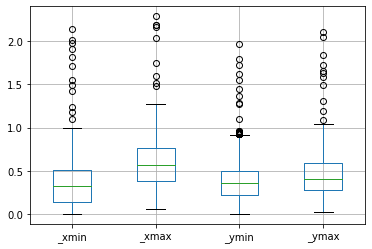

In [102]:
Data_Augmented_P[['_xmin','_xmax','_ymin','_ymax']].boxplot()

In [107]:
train[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax']]

,filename,class,_xmin,_ymin,_xmax,_ymax
306,54_form_aug_4.jpg,3,0.638166,0.397842,0.762082,0.416547
802,140_form_aug_3.jpg,1,0.341667,0.144174,0.632407,0.160632
1069,186_form_aug_0.jpg,1,0.849378,0.338889,0.869679,0.660185
2929,519_form_aug_4.jpg,3,0.036325,0.227780,0.253205,0.238935
2031,360_form_aug_3.jpg,1,0.000000,0.024828,0.578442,0.233793
...,...,...,...,...,...,...
1469,255_form_aug_0.jpg,1,0.120172,0.045172,0.951717,0.091474
2679,474_form_aug_0.jpg,1,0.843906,0.000000,0.947256,0.338211
219,39_form_aug_4.jpg,2,0.105676,0.697595,0.364734,0.759450
1725,301_form_aug_0.jpg,1,0.343348,0.095499,0.820815,0.156934


In [112]:
importlib.reload(tf_d)

tF_train = tf_d.build_sources_from_metadata(train[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax',]] , os.path.join("..", "data" , "augmented","img"))
tF_test = tf_d.build_sources_from_metadata(test[['filename', 'class', '_xmin', '_ymin', '_xmax', '_ymax',]] , os.path.join("..", "data" , "augmented","img"))


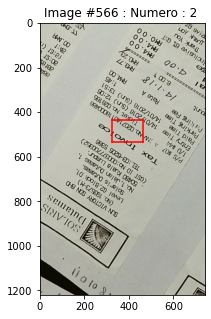

In [117]:
importlib.reload(MyPlot) 
MyPlot.display_random_image(Data_Augmented_P[['filename','_xmin', '_xmax', '_ymin', '_ymax','class']],2,True,image_path = '../data/augmented/img')

## TensorFlow DataSet

In [118]:
tf_Data_train = tf_d.make_tf_dataset(tF_train, training=True,
    batch_size=4, num_epochs=1,
    num_parallel_calls=2)

tf_Data_test = tf_d.make_tf_dataset(tF_test, training=True,
    batch_size=1, num_epochs=1,
    num_parallel_calls=2)

##### Image Plot with bounding box

[0.36373392 0.5450644  0.33701658 0.3655617 ]
82.5675992667675
123.72961646318436
[0.5777778  0.86388886 0.7930583  0.86509496]
131.15556126832962
196.10277116298676
[0.72892207 0.88900745 0.5272602  0.5879917 ]
165.4653096795082
201.8046909570694
[0.5824411  1.         0.00394407 0.1115095 ]
132.21412777900696
227.0


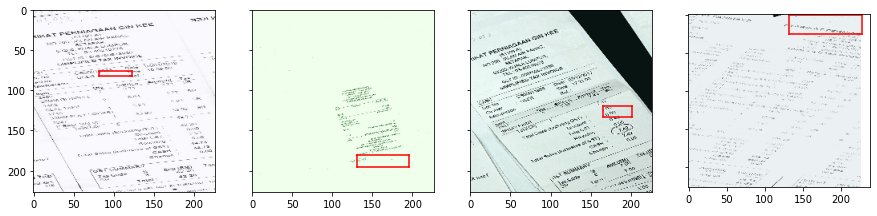

In [119]:
importlib.reload(MyPlot) 
dataset = iter(tf_Data_train)
MyPlot.imshow_batch_of_three(next(dataset),show_box=True, num_images = 4)

# Modelling


In [120]:
# Define a simple sequential model
def create_model():
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(227,227,3)))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=4, activation = 'sigmoid'))
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(0.0001))

    return model

In [121]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 223, 223, 6)       456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 44944)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               5393400   
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

##### Evaluate DataSet

In [122]:
print(model.evaluate(tf_Data_train))

566/566 [==============================] - 9s 16ms/step - loss: 0.0983
0.09834989905357361


## Fit Model

In [124]:
H = model.fit(x=tf_Data_train, epochs=100,validation_data=tf_Data_test, validation_steps=1)

Epoch 1/100
566/566 [==============================] - 10s 17ms/step - loss: 0.0812 - val_loss: 0.0711
Epoch 2/100
566/566 [==============================] - 10s 17ms/step - loss: 0.0612 - val_loss: 0.0407
Epoch 3/100
566/566 [==============================] - 9s 17ms/step - loss: 0.0612 - val_loss: 0.1647
Epoch 4/100
566/566 [==============================] - 9s 17ms/step - loss: 0.0611 - val_loss: 0.0740
Epoch 5/100
566/566 [==============================] - 9s 17ms/step - loss: 0.0613 - val_loss: 0.0699
Epoch 6/100
566/566 [==============================] - 11s 19ms/step - loss: 0.0612 - val_loss: 0.0712
Epoch 7/100
566/566 [==============================] - 10s 17ms/step - loss: 0.0611 - val_loss: 0.0053
Epoch 8/100
566/566 [==============================] - 9s 17ms/step - loss: 0.0611 - val_loss: 0.0445
Epoch 9/100
566/566 [==============================] - 9s 17ms/step - loss: 0.0611 - val_loss: 0.0418
Epoch 10/100
566/566 [==============================] - 9s 17ms/step - loss: 0

566/566 [==============================] - 9s 16ms/step - loss: 0.0608 - val_loss: 0.0809
Epoch 81/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0608 - val_loss: 0.0499
Epoch 82/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0608 - val_loss: 0.1565
Epoch 83/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0607 - val_loss: 0.0499
Epoch 84/100
566/566 [==============================] - 9s 17ms/step - loss: 0.0607 - val_loss: 0.1559
Epoch 85/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0608 - val_loss: 0.0498
Epoch 86/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0607 - val_loss: 0.0059
Epoch 87/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0607 - val_loss: 0.1563
Epoch 88/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0608 - val_loss: 0.0814
Epoch 89/100
566/566 [==============================] - 9s 16ms/step - loss: 0.0607 - 

# Evaluate Results

## Plot training loss

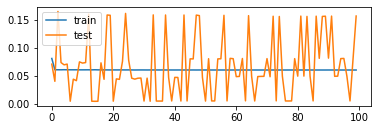

In [125]:
plt.subplot(2,1,1)
plt.plot(H.history['loss'],label='train')
plt.plot(H.history['val_loss'],label='test')
plt.legend()

## Intersection over Union

In the simplest case, segmentation is the process of dividing a digital image into several segments. The result of instance segmentation using Mask R-CNN is a mask applied to the desired object and a bounding box around this object.

[Intersection over union](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=What%20is%20Intersection%20over%20Union,the%20popular%20PASCAL%20VOC%20challenge.) (IoU) is known to be a good metric for measuring overlap between two bounding boxes or masks.

<img src="https://miro.medium.com/max/423/1*2w493Z_V6-sE_3aYa48a9w.png" style="width:40%;">

If the prediction is completely correct, IoU = 1. The lower the IoU, the worse the prediction result.

<img src="https://miro.medium.com/max/646/1*eF0J8KcQqJQF3N0J1vmKwA.png" style="width:40%;">

## Plot Predictions

In [126]:
Data_Predict= model.predict(tf_Data_test)

In [127]:
Data_Predict.shape

(754, 4)

In [128]:
Data_Predict

array([[0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       ...,
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ],
       [0.33428112, 0.5714214 , 0.368103  , 0.4392347 ]], dtype=float32)

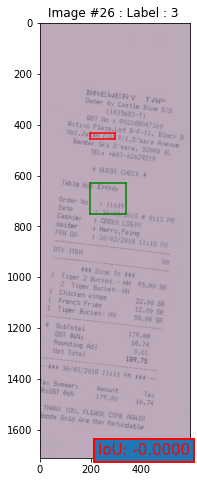

In [132]:
importlib.reload(MyPlot) 
MyPlot.display_random_image_Pre(test[["filename","_xmin","_xmax","_ymin","_ymax","class"]],Data_Predict , image_path='../data/augmented/img')

# Save Model

In [133]:
tf.saved_model.save(model, "../models/Custom_Models/Augmented/")


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ../models/Custom_Models/Augmented/assets
